*This notebook has been **significantly** modified from the original notebook available online, as detailed next. This notebook contains an excerpt from the [Python Data Science Handbook](http://shop.oreilly.com/product/0636920034919.do) by Jake VanderPlas; the content is available [on GitHub](https://github.com/jakevdp/PythonDataScienceHandbook).*<br>
*The text is released under the [CC-BY-NC-ND license](https://creativecommons.org/licenses/by-nc-nd/3.0/us/legalcode), and code is released under the [MIT license](https://opensource.org/licenses/MIT).*

#  Principal Component Analysis 
**Unsupervised learning for dimensionality reduction, noise filtering, feature selection, and classification** 

Up until now, we have been looking in depth at supervised learning estimators: those estimators that predict labels based on labeled training data.

>* **Here we begin looking at unsupervised estimators, which can highlight interesting aspects of the data without reference to any known labels.**
>* In this notebook, we explore what is perhaps one of the most broadly used of unsupervised algorithms, **principal component analysis (PCA)**.

>**Typical applications of PCA**:<br>
>* a dimensionality reduction algorithm;
>* a tool for visualization;
>* for noise filtering;
>* feature extraction and engineering.

After a brief conceptual discussion of the PCA algorithm, we will see a couple examples of these further applications.

We begin with the standard imports:

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

## Introducing Principal Component Analysis

Principal component analysis is a fast and flexible unsupervised method for dimensionality reduction in data.

**Its behavior is easiest to visualize by looking at a two-dimensional dataset.**<br>
Consider the following 200 points:

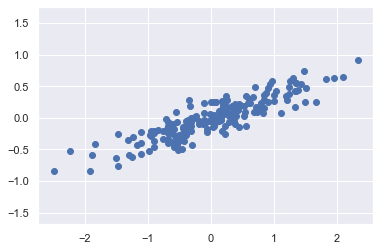

In [2]:
# generating 200 random points, organized around a linear trend

rng = np.random.RandomState(1)

# rng.rand generates samples from the “standard normal” distribution (more points towards the center).
# dot product between two matrices
# a 2x2 matrix and a 2x200 matrix
X = np.dot(rng.rand(2, 2), rng.randn(2, 200)).T

# x values: first column X[:, 0] 
# y values: second column X[:, 1]
plt.scatter(X[:, 0], X[:, 1])
plt.axis('equal');

By eye, it is clear that there is a nearly linear relationship between the x and y variables.<br>
This is reminiscent of the linear regression data we explored already. 

**But the problem setting here is slightly different**: rather than attempting to *predict* the y values from the x values, **the unsupervised learning problem attempts to learn about the *relationship* between the x and y values**.

**In PCA, this relationship is quantified by finding a list of the *principal axes* in the data, and using those axes to describe the dataset.**

Using Scikit-Learn's ``PCA`` estimator, we can compute this as follows:

In [3]:
from sklearn.decomposition import PCA

# looking for 2 principal axes that describe the dataset
pca = PCA(n_components=2)

# fit those two axes to the data
pca.fit(X)

PCA(n_components=2)

**The fit learns** some quantities from the data, most importantly the **components** and the **explained variance**:

In [4]:
# the two principal componets (vectors) provide the direction of each component
print(pca.components_)

[[-0.94446029 -0.32862557]
 [-0.32862557  0.94446029]]


In [5]:
# the two explained variances provide the squared-lenght (the influence) of the vector
print(pca.explained_variance_)

[0.7625315 0.0184779]


**To interprete these numbers, we can say that**:
* the first component (axis with direction [-0.94446029 -0.32862557]) has greater influence over the data (explained_variance = 0.7625315)
* the second component (axis with direction [-0.32862557  0.94446029]) has much smaller influence over the data (explained_variance = 0.0184779)

To see what these numbers mean, **let's visualize them as vectors over the input data**:<br>
* Each **component** defines the **direction** of the each of the two principal axes 
* Each **explained variance** defines the **squared-length** (influence) of the vector:

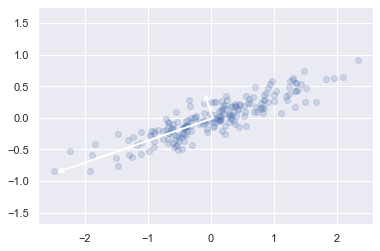

In [6]:
def draw_vector(v0, v1, ax=None):
    ax = ax or plt.gca()
    arrowprops=dict(arrowstyle='->',
                    linewidth=2,
                    shrinkA=0, shrinkB=0)
    ax.annotate('', v1, v0, arrowprops=arrowprops)

# plot data
plt.scatter(X[:, 0], X[:, 1], alpha=0.2)
for length, vector in zip(pca.explained_variance_, pca.components_):
    v = vector * 3 * np.sqrt(length)
    draw_vector(pca.mean_, pca.mean_ + v)
plt.axis('equal');

**These vectors represent the *principal axes* of the data**.<br>
**The length of each of the vectors is an indication of how "important" that axis is in describing the distribution of the data**.<br>
**It is a measure of the variance of the data when projected onto that axis**.<br>

>**The projection of each data point onto the principal axes are the "principal components" of the data.**


While this algorithm to find principal components may seem like just a mathematical curiosity, it turns out to have very far-reaching applications in the world of machine learning and data exploration.

**Next, we'll look at PCA applications in different situations.**

### PCA as dimensionality reduction

Using PCA for dimensionality reduction involves **zeroing out one or more of the smallest principal components**, resulting in a lower-dimensional projection of the data that preserves the maximal data variance.

The following figure exemplifies the whole process:
* Top-left panel: original data with two features (two dimensions in the data). The two PCA components are shown with arrows;
* Top-right panel: data transformed into the principal components space;
* Bottom-left panel: data projected into first principal component (2nd component dropped);
* Bottom-right panel: the inverse transformation brings the dataset back from PCA space into its original 2D-space. Some information has been lost while reducing the dimensions from 2 down to 1, and it cannot be recovered.

![](figures/PCA-dimensionality-reduction-and-inverse-transform.png)



### Example PCA as a dimensionality reduction
Here is an example of using PCA as a dimensionality reduction transform: **going from 2 down to 1 dimension**.

In [7]:
# looking for 1 principal axis that describes the dataset
pca = PCA(n_components=1)

# fit the whole dataset to the principal axis component
pca.fit(X)

# project the original dataset into a 1-dimensional representation
X_pca = pca.transform(X)

# checking that the original data has 2 dimensions 
print("original shape:   ", X.shape)

# checking that the transformed data has 1 dimension 
print("transformed shape:", X_pca.shape)

original shape:    (200, 2)
transformed shape: (200, 1)


The transformed data has been reduced to a single dimension.
To understand the effect of this dimensionality reduction, we can perform the inverse transform of this reduced data and plot it along with the original data:

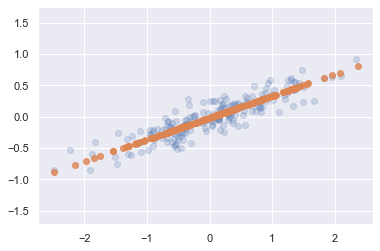

In [8]:
X_new = pca.inverse_transform(X_pca)
plt.scatter(X[:, 0], X[:, 1], alpha=0.2)
plt.scatter(X_new[:, 0], X_new[:, 1], alpha=0.8)
plt.axis('equal');

The light points are the original data, while the dark points are the projected version.
This makes clear what a PCA dimensionality reduction means: 
>* the information along the least important principal axis or axes is removed, leaving only the component(s) of the data with the highest variance;
>* the fraction of variance that is cut out (proportional to the spread of points about the line formed in this figure) is roughly a measure of how much "information" is discarded in this reduction of dimensionality.

This reduced-dimension dataset is in some senses "good enough" to encode the most important relationships between the points: 
>**Despite reducing the dimension of the data by 50%, the overall relationship between the data points are mostly preserved**.

### PCA for imaging: Represent hand-written digits (images) in lower dimensions

The usefulness of the dimensionality reduction may not be entirely apparent in only two dimensions, but becomes much more clear when looking at high-dimensional data.

To see this, let's take a quick look at the application of PCA to a digits dataset. The data consists of 8×8 pixel images, meaning that they are **64-dimensional**, as exemplified in this figure:

![](figures/digits-datasest.png)



>**We start by loading the data**:

In [9]:
from sklearn.datasets import load_digits
digits = load_digits()
digits.data.shape

(1797, 64)

>To gain some intuition into the relationships between these points, we can **use PCA to project them from a 64-dimension down to a more manageable number of dimensions, say two**:

In [10]:
pca = PCA(2)  # project from 64 to 2 dimensions
projected = pca.fit_transform(digits.data)
print(digits.data.shape)
print(projected.shape)

(1797, 64)
(1797, 2)


We can now plot the first two principal components of each point to learn about the data:

these are the target digits or lables (not used in PCA) [0 1 2 ... 8 9 8]


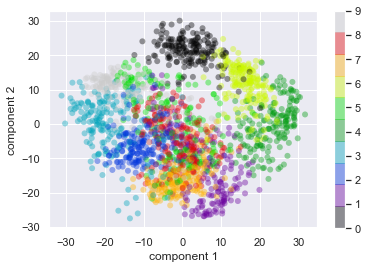

In [11]:
print("these are the target digits or lables (not used in PCA)", digits.target)

#plt.scatter(projected[:, 0], projected[:, 1],
#            c=digits.target, edgecolor='none', alpha=0.5,
#            cmap=plt.cm.get_cmap('spectral', 10))


# N.B. the c=digits.target option sets 10 colors (one per digit)
# N.B. this info (the labels) has NOT been used in PCA(). It's only used here to 
#      visualize how the 10 digits scatter in a rapresentation with 2 instead of 64 features
plt.scatter(projected[:, 0], projected[:, 1],
            c=digits.target, edgecolor='none', alpha=0.4,
            cmap=plt.cm.get_cmap('nipy_spectral', 10))
        


plt.xlabel('component 1')
plt.ylabel('component 2')
plt.colorbar();

**Recall what these components mean**:<br>
The full data is a 64-dimensional dataset, and these points are the projection of each data point along the directions with the largest variance:<br>
* **We have found the optimal stretch and rotation in 64-dimensional space that allows us to see the layout of the digits in two dimensions**;
* **We have done this in an unsupervised manner—that is, without reference to the labels**.

### What do the components mean?

We can go a bit further here, and begin to ask what the reduced dimensions *mean*.
This meaning can be understood in terms of combinations of basis vectors.
For example, each image in the training set is defined by a collection of 64 pixel values, which we will call the vector $x$:

$$
x = [x_1, x_2, x_3 \cdots x_{64}]
$$

**One way we can think about this is in terms of a pixel basis**.
That is, **to construct the image, we multiply each element of the vector by the pixel it describes, and then add the results together to build the image**:

$$
{\rm image}(x) = x_1 \cdot{\rm (pixel~1)} + x_2 \cdot{\rm (pixel~2)} + x_3 \cdot{\rm (pixel~3)} \cdots x_{64} \cdot{\rm (pixel~64)}
$$

> **One way we might imagine reducing the dimension of this data is to zero out all but a few of these basis vectors**.

### An example showing the wrong way of reducing dimensions
For example, **if we use only the first eight pixels**, we get an eight-dimensional projection of the data, but it is **not very reflective of the whole image: we've thrown out nearly 90% of the pixels!**
![](figures/05.09-digits-pixel-components.png)

>The upper row of panels shows the individual pixels;<br>
>The lower row shows the cumulative contribution of these pixels to the construction of the image.

Using only eight of the pixel-basis components, we can only construct a small portion of the 64-pixel image.

### A better way to reduce dimensions using other basis functions
We can also use other basis functions, which each contain some pre-defined contribution from each pixel, and write something like

$$
image(x) = {\rm mean} + x_1 \cdot{\rm (basis~1)} + x_2 \cdot{\rm (basis~2)} + x_3 \cdot{\rm (basis~3)} \cdots
$$

>* **PCA can be thought of as a process of choosing optimal basis functions, such that adding together just the first few of them is enough to suitably reconstruct the bulk of the elements in the dataset**.
>* **The principal components, which act as the low-dimensional representation of our data, are simply the coefficients that multiply each of the elements in this series**.

**This figure shows a similar depiction of reconstructing this digit using the mean plus the first eight PCA basis functions**:
![](figures/05.09-digits-pca-components.png)

Unlike the pixel basis, 
>**the PCA basis allows us to recover the salient features of the input image with just a mean plus eight components!**

The amount of each pixel in each component is the corollary of the orientation of the vector in our two-dimensional example.
This is the sense in which PCA provides a low-dimensional representation of the data: it discovers a set of basis functions that are more efficient than the native pixel-basis of the input data.

## Tunig PCA
### Choosing the number of components

**A vital part of using PCA in practice is the ability to estimate how many components are needed to describe the data.**

This can be determined by looking at the **cumulative explained variance ratio** as a function of the number of components:

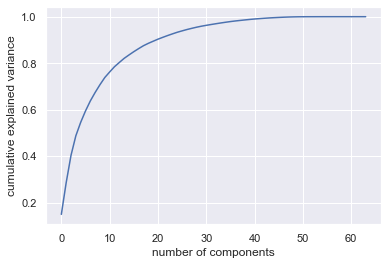

In [12]:
# N.B. if we instantiate PCA() without setting the number of components
#      all components are kept: n_components == min(n_samples, n_features)
# So in this case, pca includes all 64 possibilities starting from 1 principal component
pca = PCA().fit(digits.data)

# pca.explained_variance_ratio_   is the array of the variance ratio for each of the N components
# np.cumsum() adds all the values of the input array
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

>**This curve quantifies how much of the total, 64-dimensional variance is contained within the first $N$ components.**

We can see that:
* **with the digits the first 10 components contain approximately 75% of the variance;**
* **you need around 50 components to describe close to 100% of the variance;**
* **Our initial two-dimensional projection loses a lot of information (as measured by the explained variance);**
* **We'd need about 20 components to retain 90% of the variance.**

>**Looking at this plot for a high-dimensional dataset can help you understand the level of redundancy present in multiple observations.**

## PCA as Noise Filtering

PCA can also be used as a filtering approach for noisy data.<br>
>**The idea is this**: any components with variance much larger than the effect of the noise should be relatively unaffected by the noise. That is, the noise will be under-represented with fewer components and ends-up being filtered out.<br>
So if you reconstruct the data using just the largest subset of principal components, you should be preferentially keeping the signal and throwing out the noise.

Let's see how this looks with the digits data.<br>
**First we will plot several of the input noise-free data:**

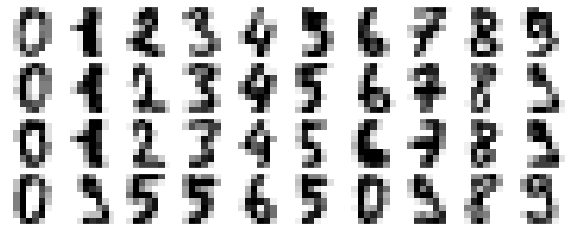

In [13]:
def plot_digits(data):
    fig, axes = plt.subplots(4, 10, figsize=(10, 4),
                             subplot_kw={'xticks':[], 'yticks':[]},
                             gridspec_kw=dict(hspace=0.1, wspace=0.1))
    for i, ax in enumerate(axes.flat):
        ax.imshow(data[i].reshape(8, 8),
                  cmap='binary', interpolation='nearest',
                  clim=(0, 16))
plot_digits(digits.data)

**Now lets add some random noise to create a noisy dataset, and re-plot it:**

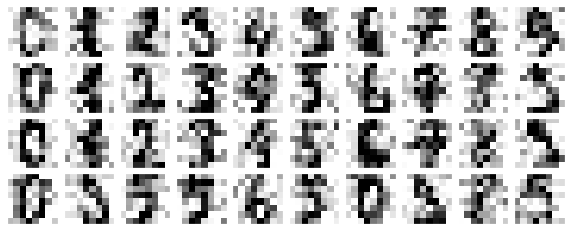

In [14]:
# setting the see of the random number generator
np.random.seed(42)

# random.normal(loc=0.0, scale=1.0, size=None)
# draws random samples from a normal (Gaussian) distribution.
# loc is the centre of the distribution
# scale is the standard deviation (spread or “width”) of the distribution. 
noisy = np.random.normal(digits.data, 4)
plot_digits(noisy)

It's clear by eye that the images are noisy, and contain spurious pixels.<br>
**Let's train a PCA on the noisy data, requesting that the projection preserve 50% of the variance:**

In [15]:
pca = PCA(0.50).fit(noisy)
pca.n_components_

12

**Here 50% of the variance amounts to 12 principal components.**

**Now we compute these components, and then use the inverse of the transform to reconstruct the filtered digits:**

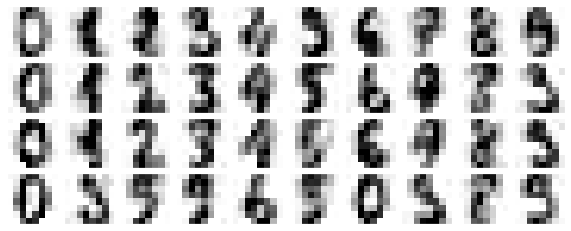

In [16]:
components = pca.transform(noisy)
filtered = pca.inverse_transform(components)
plot_digits(filtered)

## PCA for feature selection / classification
This signal preserving (and noise filtering) property makes PCA a very useful feature selection routine. 

>**For example, rather than training a classifier on very high-dimensional data, you might instead train the classifier on the lower-dimensional representation, which will automatically serve to filter out random noise in the inputs.**

## Example: feature selection for imaging with Eigenfaces

In one of our next notebooks, we are going to explore an example for using PCA projections as a feature selector for facial recognition with a support vector machine. 

But first, we need to see how PCA will be used to reduce features from 3,000 features, down to 150 features. This is very useful in image processing and image recognition. 

We are going to use the Labeled Faces in the Wild dataset made available through Scikit-Learn:

In [17]:
from sklearn.datasets import fetch_lfw_people
faces = fetch_lfw_people(min_faces_per_person=60)
print(faces.target_names)
print(faces.images.shape)

['Ariel Sharon' 'Colin Powell' 'Donald Rumsfeld' 'George W Bush'
 'Gerhard Schroeder' 'Hugo Chavez' 'Junichiro Koizumi' 'Tony Blair']
(1348, 62, 47)


**Let's plot a few of these faces to see what we're working with:**

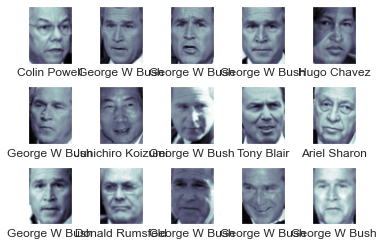

In [18]:
fig, ax = plt.subplots(3, 5)
fig.subplots_adjust(hspace=0.4, wspace=0.4)
#ax.tick_params(axis='x', labelsize=9)
for i, axi in enumerate(ax.flat):
    axi.imshow(faces.images[i], cmap='bone')
    axi.set(xticks=[], yticks=[],
            xlabel=faces.target_names[faces.target[i]])
           

Let's take a look at the principal axes that span this dataset.

**This is a very high-dimensional dataset, with nearly 3,000 features.**

>The standard ``PCA`` estimator is not very efficient for these large dimensions/datasets. We are going to use the ``RandomizedPCA`` method instead, which contains a randomized method to approximate the first $N$ principal components much more quickly.

**We will take a look at the first 150 components:**

In [19]:
#from sklearn.decomposition import RandomizedPCA
#pca = RandomizedPCA(150)

from sklearn.decomposition import PCA as RandomizedPCA
pca = RandomizedPCA(150, svd_solver='randomized', whiten=True)
pca.fit(faces.data)

PCA(n_components=150, svd_solver='randomized', whiten=True)

### Let's visualize the eigenfaces
**The images associated with the first several principal components**, technically known as "eigenvectors", are called "eigenfaces".<br>
As you can see in this figure, they are as creepy as they sound:

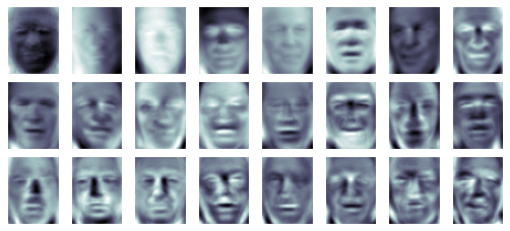

In [20]:
fig, axes = plt.subplots(3, 8, figsize=(9, 4),
                         subplot_kw={'xticks':[], 'yticks':[]},
                         gridspec_kw=dict(hspace=0.1, wspace=0.1))

# displays the reprentation of the images along the first 24 pca components
for i, ax in enumerate(axes.flat):
    ax.imshow(pca.components_[i].reshape(62, 47), cmap='bone')

### Some insights

The results are very interesting, and give us insight into how the images vary: 
* **the first few eigenfaces (from the top left) seem to be associated with the angle of lighting on the face**;
* **the later principal vectors seem to be picking out certain features, such as eyes, noses, and lips**.

### Cumulative variance of these components
Let's take a look at the cumulative variance of these components **to see how much of the data information the projection is preserving**:

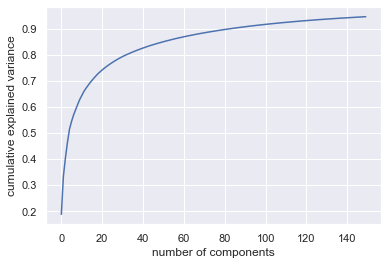

In [21]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

**We see that these 150 components account for over 90% of the variance**.<br>
That would lead us to believe that using these 150 components, we would recover most of the essential characteristics of the data.

**Let's compare these reconstructed images with the originals**.<br>
To make this more concrete, we can compare the input images with the images reconstructed from these 150 components:

In [22]:
# Compute the components and projected faces
pca = RandomizedPCA(150).fit(faces.data)
components = pca.transform(faces.data)
projected = pca.inverse_transform(components)

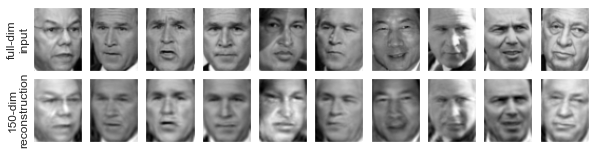

In [23]:
# Plot the results
fig, ax = plt.subplots(2, 10, figsize=(10, 2.5),
                       subplot_kw={'xticks':[], 'yticks':[]},
                       gridspec_kw=dict(hspace=0.1, wspace=0.1))
for i in range(10):
    ax[0, i].imshow(faces.data[i].reshape(62, 47), cmap='binary_r')
    ax[1, i].imshow(projected[i].reshape(62, 47), cmap='binary_r')
    
ax[0, 0].set_ylabel('full-dim\ninput')
ax[1, 0].set_ylabel('150-dim\nreconstruction');

### Some insights
The top row here shows the input images, while the bottom row shows the reconstruction of the images from just 150 of the ~3,000 initial features.

**We can see that the PCA feature selection succeds in reducing the dimensionality of the data by a factor of nearly 20, yet preserving enough information for us to recognize the individuals in the image.**


## Principal Component Analysis Summary

In this notebook, we have discussed the use of principal component analysis for dimensionality reduction, for visualization of high-dimensional data, for noise filtering, and for feature selection within high-dimensional data.

Because of the versatility and interpretability of PCA, it has been shown to be effective in a wide variety of contexts and disciplines.
Given any high-dimensional dataset, I tend to start with PCA in order to visualize the relationship between points (as we did with the digits), to understand the main variance in the data (as we did with the eigenfaces), and to understand the intrinsic dimensionality (by plotting the explained variance ratio).

Certainly PCA is not useful for every high-dimensional dataset, but it offers a straightforward and efficient path to gaining insight into high-dimensional data.

**PCA's main weakness** is that it tends to be highly affected by outliers in the data.
For this reason, many robust variants of PCA have been developed, many of which act to iteratively discard data points that are poorly described by the initial components.
Scikit-Learn contains a couple interesting variants on PCA, including ``RandomizedPCA`` and ``SparsePCA``, both also in the ``sklearn.decomposition`` submodule.
``RandomizedPCA``, which we saw earlier, uses a non-deterministic method to quickly approximate the first few principal components in very high-dimensional data, while ``SparsePCA`` introduces a regularization term that serves to enforce sparsity of the components.

>**In the next notebook, we'll combine this PCA feature selection method with Support Vector Machines, to show its efficiency in a complete classification problem.**
